In [1]:
import pyfolio as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/environment/miniconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 设置绘图风格
plt.style.use('seaborn')

# 解决中文乱码等问题
plt.rcParams["font.sans-serif"] = ["SIMHEI"]
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df = pd.read_excel("佑维CTA进取三号净值20230823.xlsx")

# 将日期列转换为日期类型
df['日期'] = pd.to_datetime(df['日期'])
df['单位净值'] = pd.to_numeric(df['单位净值'])
df.set_index("日期", inplace=True)

# 净值分类
jz_type = "复权净值"


In [5]:
# 计算成立以来收益率(每周)
df['成立以来收益率(每周)'] = (df[jz_type] - df[jz_type].iloc[-1]) / df[jz_type].iloc[-1]

# 计算成立以来年化收益率(每周)
def date_diff(last_date,first_date):
    return (last_date- first_date).days + 1
df['成立以来年化收益率(每周)'] = ((1 + df['成立以来收益率(每周)']) ** (365 / date_diff(df.index, df.index[-1]))) - 1


# 计算每周的动态回撤值
df['动态回撤值'] = -(df[jz_type][::-1].cummax() - df[jz_type]) / df[jz_type][::-1].cummax()

# 最大回撤值
max_drawdown = df['动态回撤值'].max()
# 期末年化收益率
last_ = df['成立以来年化收益率(每周)'].iloc[0]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SIMHEI
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SIMHEI


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SIMHEI


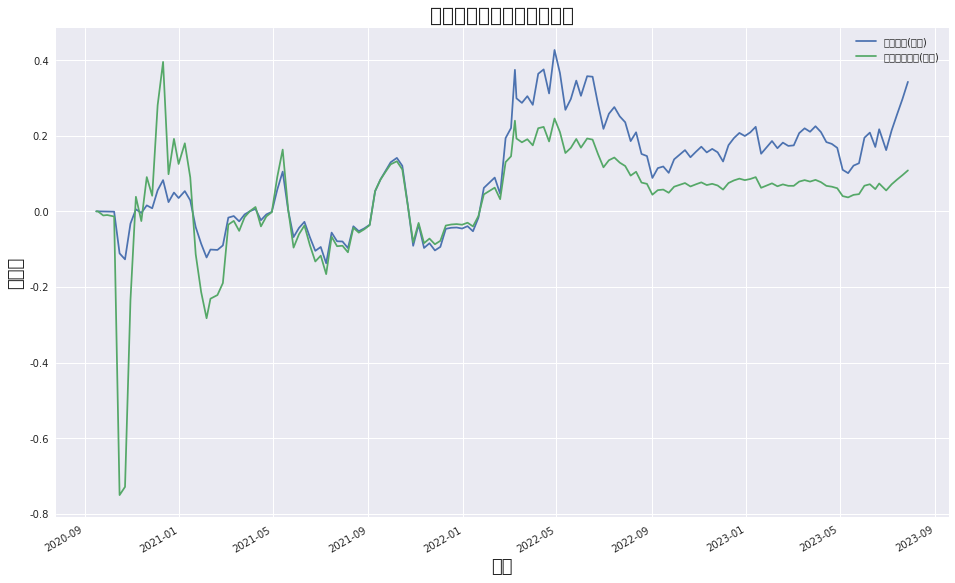

In [6]:
# 创建一个新的图形
plt.figure(figsize=(16, 10))

# 绘制成立以来收益率(每周)折线
plt.plot(df.index, df['成立以来收益率(每周)'], label='收益曲线(每周)')
plt.plot(df.index, df['成立以来年化收益率(每周)'], label='年化收益曲线(每周)')

# 添加标题和标签
plt.title('基金成立以来收益率折线图',fontsize = 20)
plt.xlabel('日期',fontsize = 18)
plt.ylabel('收益率',fontsize = 18)
plt.legend()

# 自动调整日期标签以避免重叠
plt.gcf().autofmt_xdate()

# 显示图例和图形
plt.show()


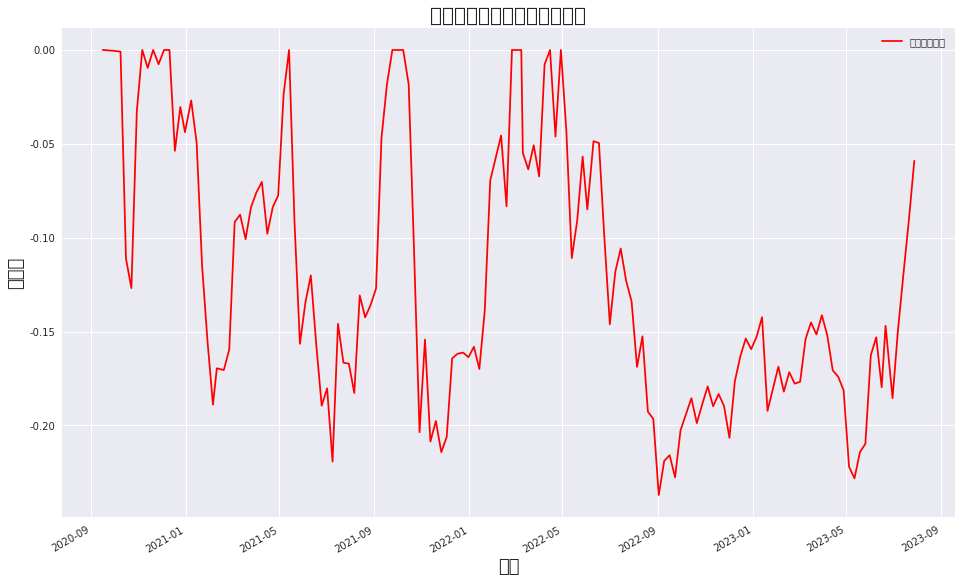

In [7]:
# 创建一个新的图形
plt.figure(figsize=(16, 10))

# 绘制成立以来收益率(每周)折线
plt.plot(df.index, df['动态回撤值'], label='动态回撤曲线', color = 'r')

# 添加标题和标签
plt.title('基金成立以来动态回撤折线图',fontsize = 20)
plt.xlabel('日期',fontsize = 18)
plt.ylabel('回撤值',fontsize = 18)
plt.legend()

# 自动调整日期标签以避免重叠
plt.gcf().autofmt_xdate()

# 显示图例和图形
plt.show()


In [8]:
df

,单位净值,累计净值,复权净值,成立以来收益率(每周),成立以来年化收益率(每周),动态回撤值
日期,,,,,,
2023-07-28,1.2343,1.3450,1.3424,0.3424,0.108215,-0.059021
2023-07-21,1.1926,1.3033,1.2971,0.2971,0.095690,-0.090775
2023-07-14,1.1549,1.2656,1.2561,0.2561,0.083985,-0.119515
2023-07-07,1.1160,1.2267,1.2138,0.2138,0.071432,-0.149166
2023-06-30,1.0683,1.1790,1.1619,0.1619,0.055276,-0.185546
...,...,...,...,...,...,...
2020-10-09,0.9991,0.9991,0.9991,-0.0009,-0.013600,-0.000900
2020-09-30,0.9996,0.9996,0.9996,-0.0004,-0.009688,-0.000400
2020-09-25,0.9997,0.9997,0.9997,-0.0003,-0.010892,-0.000300
